In [56]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:

import os
os.environ['PYTHONHASHSEED'] = '0'
import random as rn
import numpy as np
np.random.seed(1)
rn.seed(3)
import tensorflow
tensorflow.random.set_seed(2)
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers.core import Dense
from keras.layers.recurrent import SimpleRNN
from keras import optimizers
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
import datetime as dt
import time
plt.style.use('ggplot')

In [58]:
# Loading the dataset
df = pd.read_excel('C:/Users/sucha/Documents/Sucharita/Upgrad_Research/Research/Forex_with_News_data.xlsx', sheet_name="MarketData")
df.tail()

,Date,"EUR/USD(Open, Ask)","EUR/USD(High, Ask)","EUR/USD(Low, Ask)","EUR/USD(Close, Ask)","EUR/USD(Open, Bid)","EUR/USD(High, Bid)","EUR/USD(Low, Bid)","EUR/USD(Close, Bid)",Difference in Close Bid in 4 hours,Class A,Class B,Class C,Class D,Group name based on Class,MAX of difference(i.e. J),MIN of difference(i.e. J),Class,Bottom Value,Top Value
15088,2007-11-23 01:00:00,1.49240,1.49380,1.4906,1.49090,1.4921,1.49350,1.49027,1.4906,-0.0036,NaN,NaN,NaN,D,D,NaN,NaN,NaN,NaN,NaN
15089,2007-11-22 23:00:00,1.49450,1.49490,1.4924,1.49240,1.4942,1.49460,1.49210,1.4921,0.0064,NaN,NaN,C,NaN,C,NaN,NaN,NaN,NaN,NaN
15090,2007-11-22 21:00:00,1.48600,1.49700,1.4860,1.49450,1.4857,1.49660,1.48570,1.4942,0.0097,NaN,NaN,C,NaN,C,NaN,NaN,NaN,NaN,NaN
15091,2007-11-22 19:00:00,1.48489,1.48615,1.4847,1.48600,1.4845,1.48590,1.48440,1.4857,1.4857,A,NaN,NaN,NaN,A,NaN,NaN,NaN,NaN,NaN
15092,2007-11-22 17:00:00,1.48548,1.48580,1.4845,1.48489,1.4851,1.48545,1.48394,1.4845,1.4845,A,NaN,NaN,NaN,A,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

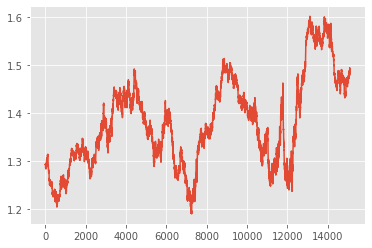

In [59]:
df['EUR/USD(Close, Bid)'].plot()

In [60]:
# Correlation matrix
df.corr()['EUR/USD(Close, Bid)']

EUR/USD(Open, Ask)                    0.999494
EUR/USD(High, Ask)                    0.999750
EUR/USD(Low, Ask)                     0.999760
EUR/USD(Close, Ask)                   1.000000
EUR/USD(Open, Bid)                    0.999495
EUR/USD(High, Bid)                    0.999750
EUR/USD(Low, Bid)                     0.999760
EUR/USD(Close, Bid)                   1.000000
Difference in Close Bid in 4 hours    0.017810
Class B                                    NaN
MAX of difference(i.e. J)                  NaN
MIN of difference(i.e. J)                  NaN
Name: EUR/USD(Close, Bid), dtype: float64

In [61]:
# Setting up an early stop
earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=80,  verbose=1, mode='min')
callbacks_list = [earlystop]

In [62]:
df = df.set_index('Date')

In [63]:
# Reverse the order 
df = pd.DataFrame(df.iloc[::-1])
df.head()

,"EUR/USD(Open, Ask)","EUR/USD(High, Ask)","EUR/USD(Low, Ask)","EUR/USD(Close, Ask)","EUR/USD(Open, Bid)","EUR/USD(High, Bid)","EUR/USD(Low, Bid)","EUR/USD(Close, Bid)",Difference in Close Bid in 4 hours,Class A,Class B,Class C,Class D,Group name based on Class,MAX of difference(i.e. J),MIN of difference(i.e. J),Class,Bottom Value,Top Value
Date,,,,,,,,,,,,,,,,,,,
2007-11-22 17:00:00,1.48548,1.48580,1.4845,1.48489,1.4851,1.48545,1.48394,1.4845,1.4845,A,NaN,NaN,NaN,A,NaN,NaN,NaN,NaN,NaN
2007-11-22 19:00:00,1.48489,1.48615,1.4847,1.48600,1.4845,1.48590,1.48440,1.4857,1.4857,A,NaN,NaN,NaN,A,NaN,NaN,NaN,NaN,NaN
2007-11-22 21:00:00,1.48600,1.49700,1.4860,1.49450,1.4857,1.49660,1.48570,1.4942,0.0097,NaN,NaN,C,NaN,C,NaN,NaN,NaN,NaN,NaN
2007-11-22 23:00:00,1.49450,1.49490,1.4924,1.49240,1.4942,1.49460,1.49210,1.4921,0.0064,NaN,NaN,C,NaN,C,NaN,NaN,NaN,NaN,NaN
2007-11-23 01:00:00,1.49240,1.49380,1.4906,1.49090,1.4921,1.49350,1.49027,1.4906,-0.0036,NaN,NaN,NaN,D,D,NaN,NaN,NaN,NaN,NaN


In [64]:
df.isna().sum()

EUR/USD(Open, Ask)                        0
EUR/USD(High, Ask)                        0
EUR/USD(Low, Ask)                         0
EUR/USD(Close, Ask)                       0
EUR/USD(Open, Bid)                        0
EUR/USD(High, Bid)                        0
EUR/USD(Low, Bid)                         0
EUR/USD(Close, Bid)                       0
Difference in Close Bid in 4 hours        0
Class A                               15091
Class B                               15093
Class C                                7514
Class D                                7581
Group name based on Class                 0
MAX of difference(i.e. J)             15092
MIN of difference(i.e. J)             15092
Class                                 15089
Bottom Value                          15089
Top Value                             15089
dtype: int64

In [65]:
df = df.drop(['Class A', 'Class B', 'Class C', 'Class D', 'Group name based on Class', 'MAX of difference(i.e. J)', 'MIN of difference(i.e. J)',
        'Class', 'Bottom Value', 'Top Value','Difference in Close Bid in 4 hours'], axis = 1)
df.rename(columns = {'EUR/USD(Open, Ask)':'open_ask', 'EUR/USD(High, Ask)':'high_ask', 'EUR/USD(Low, Ask)':'low_ask','EUR/USD(Close, Ask)':'close_ask',
                           'EUR/USD(Open, Bid)':'open_bid','EUR/USD(High, Bid)':'high_bid','EUR/USD(Low, Bid)':'low_bid','EUR/USD(Close, Bid)':'close_bid'}, inplace = True)
df.head(2)

,open_ask,high_ask,low_ask,close_ask,open_bid,high_bid,low_bid,close_bid
Date,,,,,,,,
2007-11-22 17:00:00,1.48548,1.48580,1.4845,1.48489,1.4851,1.48545,1.48394,1.4845
2007-11-22 19:00:00,1.48489,1.48615,1.4847,1.48600,1.4845,1.48590,1.48440,1.4857


In [67]:
df.head(2)

,open_ask,high_ask,low_ask,close_ask,open_bid,high_bid,low_bid,close_bid
Date,,,,,,,,
2007-11-22 17:00:00,1.48548,1.48580,1.4845,1.48489,1.4851,1.48545,1.48394,1.4845
2007-11-22 19:00:00,1.48489,1.48615,1.4847,1.48600,1.4845,1.48590,1.48440,1.4857


## Model Building

In [69]:
# Extracting the series
series = df[['open_ask','high_ask','low_ask','close_ask','open_bid','high_bid','low_bid','close_bid']] # Picking the multivariate series 
print(series.shape)
print(series.tail())

(15093, 8)
                     open_ask  high_ask  low_ask  close_ask  open_bid  \
Date                                                                    
2012-09-27 21:00:00   1.29207   1.29441  1.29099    1.29381   1.29179   
2012-09-27 23:00:00   1.29381   1.29429  1.29303    1.29350   1.29355   
2012-09-28 01:00:00   1.29350   1.29425  1.29255    1.29262   1.29323   
2012-09-28 03:00:00   1.29262   1.29486  1.29230    1.29472   1.29242   
2012-09-28 05:00:00   1.29472   1.29608  1.29356    1.29399   1.29447   

                     high_bid  low_bid  close_bid  
Date                                               
2012-09-27 21:00:00   1.29414  1.29071    1.29355  
2012-09-27 23:00:00   1.29402  1.29278    1.29323  
2012-09-28 01:00:00   1.29401  1.29232    1.29242  
2012-09-28 03:00:00   1.29463  1.29205    1.29447  
2012-09-28 05:00:00   1.29587  1.29332    1.29374  


In [70]:
# Train Val Test Split
train_start = dt.datetime(2007, 11, 22, 17, 00, 00)
train_end = dt.datetime(2010, 12, 31, 11, 00, 00)
train_data = series.loc[train_start:train_end]

val_start = dt.datetime(2011, 1, 2, 17, 00, 00)
val_end = dt.datetime(2011, 12, 30, 15, 00, 00)
val_data = series.loc[val_start:val_end]

test_start = dt.datetime(2012, 1, 1, 21, 00, 00)
test_end = dt.datetime(2012, 9, 28, 5, 00, 00)
test_data = series.loc[test_start:test_end]

print(train_data.shape,val_data.shape,test_data.shape)

(9636, 8) (3121, 8) (2336, 8)


In [71]:
# Normalisation
sc = MinMaxScaler()
train = sc.fit_transform(train_data)
val = sc.transform(val_data)
test = sc.transform(test_data)
print(train.shape,val.shape,test.shape)

(9636, 8) (3121, 8) (2336, 8)


Deep AR - Gluon TS

In [72]:
#!pip install --upgrade mxnet-cu101==1.6.0.post0
!pip install --upgrade mxnet==1.6.0
!pip install gluonts

Requirement already up-to-date: mxnet==1.6.0 in c:\users\sucha\anaconda3\lib\site-packages (1.6.0)


ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "C:\Users\sucha\anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "C:\Users\sucha\anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\sucha\anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3012, in _parsed_pkg_info
    return self._pkg_info
  File "C:\Users\sucha\anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\sucha\anaconda3\lib\site-packages\pip\_inter

ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "C:\Users\sucha\anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "C:\Users\sucha\anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\sucha\anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3012, in _parsed_pkg_info
    return self._pkg_info
  File "C:\Users\sucha\anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\sucha\anaconda3\lib\site-packages\pip\_inter

In [73]:

from gluonts.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer
import numpy as np

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [74]:
df_input=series.reset_index(drop=True).T.reset_index()

In [75]:
df_input

,index,0,1,2,3,4,5,6,7,8,...,15083,15084,15085,15086,15087,15088,15089,15090,15091,15092
0,open_ask,1.48548,1.48489,1.4860,1.4945,1.49240,1.49090,1.48550,1.47881,1.48198,...,1.28621,1.28968,1.29171,1.29134,1.29121,1.29207,1.29381,1.29350,1.29262,1.29472
1,high_ask,1.48580,1.48615,1.4970,1.4949,1.49380,1.49354,1.48650,1.48249,1.48200,...,1.29062,1.29296,1.29202,1.29197,1.29209,1.29441,1.29429,1.29425,1.29486,1.29608
2,low_ask,1.48450,1.48470,1.4860,1.4924,1.49060,1.48500,1.47858,1.47880,1.47979,...,1.28300,1.28863,1.29111,1.29120,1.29094,1.29099,1.29303,1.29255,1.29230,1.29356
3,close_ask,1.48489,1.48600,1.4945,1.4924,1.49090,1.48550,1.47881,1.48198,1.47999,...,1.28968,1.29171,1.29134,1.29121,1.29207,1.29381,1.29350,1.29262,1.29472,1.29399
4,open_bid,1.48510,1.48450,1.4857,1.4942,1.49210,1.49060,1.48520,1.47853,1.48180,...,1.28600,1.28945,1.29148,1.29106,1.29093,1.29179,1.29355,1.29323,1.29242,1.29447
5,high_bid,1.48545,1.48590,1.4966,1.4946,1.49350,1.49330,1.48621,1.48231,1.48180,...,1.29039,1.29273,1.29178,1.29164,1.29182,1.29414,1.29402,1.29401,1.29463,1.29587
6,low_bid,1.48394,1.48440,1.4857,1.4921,1.49027,1.48481,1.47841,1.47852,1.47951,...,1.28274,1.28840,1.29090,1.29091,1.29068,1.29071,1.29278,1.29232,1.29205,1.29332
7,close_bid,1.48450,1.48570,1.4942,1.4921,1.49060,1.48520,1.47853,1.48180,1.47971,...,1.28945,1.29148,1.29106,1.29093,1.29179,1.29355,1.29323,1.29242,1.29447,1.29374


In [76]:
data_new.iloc[0]

open_1            1.471330
close_1           1.470790
high_1            1.471690
low_1             1.470590
avg_price_5       1.471720
avg_price_30      1.470775
avg_price_90      1.470403
avg_price_365     1.464040
return_1         -0.000367
return_5         -0.000483
return_30        -0.002597
return_90         0.009874
return_365       -0.009235
moving_avg_5     -0.000096
moving_avg_30    -0.000086
moving_avg_90     0.000110
moving_avg_365   -0.000024
close             1.471100
Name: 2008-02-20 01:00:00, dtype: float64

In [77]:
data_new.iloc[11490]

open_1            1.379270
close_1           1.378350
high_1            1.379490
low_1             1.378020
avg_price_5       1.378864
avg_price_30      1.378602
avg_price_90      1.378872
avg_price_365     1.419173
return_1         -0.000667
return_5         -0.001695
return_30         0.009137
return_90        -0.021684
return_365       -0.026561
moving_avg_5     -0.000339
moving_avg_30     0.000305
moving_avg_90    -0.000241
moving_avg_365   -0.000071
close             1.415510
Name: 2011-10-28 15:00:00, dtype: float64

In [78]:
ts_code=df_input["index"].astype('category').cat.codes.values

In [79]:
ts_code

array([6, 2, 4, 0, 7, 3, 5, 1], dtype=int8)

In [80]:
df_input.shape

(8, 15094)

In [81]:
df_train=df_input.iloc[:,1:11490].values
df_test=df_input.iloc[:,11490:].values

In [82]:
df_train.shape

(8, 11489)

In [83]:
df_test.shape

(8, 3604)

In [84]:
freq="120min"
start_train = pd.Timestamp("2008-02-20 01:00:00", freq=freq)
start_test = pd.Timestamp("2011-10-28 15:00:00", freq=freq)
#predict for number of time frames
prediction_lentgh=48 

In [85]:
# context length - how much previous days of data to be taken
estimator = DeepAREstimator(freq=freq, 
                            context_length=120,
                            prediction_length=prediction_lentgh,
                            use_feat_static_cat=True,
                            cardinality=[1],
                            num_layers=2,
                            num_cells=32,
                            cell_type='lstm',
                            trainer=Trainer(epochs=5))

In [86]:
df_train[0:7]

array([[1.48548, 1.48489, 1.486  , ..., 1.40947, 1.41192, 1.41108],
       [1.4858 , 1.48615, 1.497  , ..., 1.41284, 1.41264, 1.41281],
       [1.4845 , 1.4847 , 1.486  , ..., 1.40787, 1.40872, 1.40744],
       ...,
       [1.4851 , 1.4845 , 1.4857 , ..., 1.40919, 1.41164, 1.41092],
       [1.48545, 1.4859 , 1.4966 , ..., 1.41261, 1.4124 , 1.41252],
       [1.48394, 1.4844 , 1.4857 , ..., 1.4076 , 1.40843, 1.40717]])

In [87]:
from gluonts.dataset.common import ListDataset
from gluonts.dataset.field_names import FieldName

train_ds = ListDataset([
    {
        FieldName.TARGET: target,
        FieldName.START: start_train,
        FieldName.FEAT_STATIC_CAT: fsc
    }
    for (target, fsc) in zip(df_train[0:7],
                             ts_code[0:7].reshape(-1,1))
], freq=freq)

test_ds = ListDataset([
    {
        FieldName.TARGET: target,
        FieldName.START: start_test,
        FieldName.FEAT_STATIC_CAT: fsc
    }
    for (target, fsc) in zip(df_test[0:7],
                            ts_code[0:7].reshape(-1,1))
], freq=freq)

In [88]:
next(iter(train_ds))

{'target': array([1.48548, 1.48489, 1.486  , ..., 1.40947, 1.41192, 1.41108],
       dtype=float32),
 'start': Timestamp('2008-02-20 00:00:00', freq='120T'),
 'feat_static_cat': array([6]),
 'source': SourceContext(source='list_data', row=0)}

In [89]:
predictor = estimator.train(training_data=train_ds)

100%|█████████████████████████████████████████████████| 50/50 [00:16<00:00,  2.97it/s, epoch=5/5, avg_epoch_loss=-2.37]


In [90]:
from gluonts.evaluation.backtest import make_evaluation_predictions

In [91]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_ds,  
    predictor=predictor,  
    num_samples=100, 
)

In [92]:
from tqdm.autonotebook import tqdm

print("Obtaining time series conditioning values ...")
tss = list(tqdm(ts_it, total=len(df_test)))
print("Obtaining time series predictions ...")
forecasts = list(tqdm(forecast_it, total=len(df_test)))

Obtaining time series conditioning values ...


  0%|          | 0/8 [00:00<?, ?it/s]

Obtaining time series predictions ...


  0%|          | 0/8 [00:00<?, ?it/s]

In [93]:
def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = prediction_lentgh
    prediction_intervals = (80.0, 95.0)
    legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ts_entry[-plot_length:].plot(ax=ax)  
    forecast_entry.plot(prediction_intervals=prediction_intervals, color='g')
    plt.grid(which="both")
    plt.legend(legend, loc="upper left")
    plt.show()

In [98]:
ts_entry

,0
2011-10-28 14:00:00,1.41670
2011-10-28 16:00:00,1.41768
2011-10-28 18:00:00,1.42155
2011-10-28 20:00:00,1.42310
2011-10-28 22:00:00,1.42842
...,...
2012-08-23 12:00:00,1.29414
2012-08-23 14:00:00,1.29402
2012-08-23 16:00:00,1.29401
2012-08-23 18:00:00,1.29463


In [99]:
forecast_entry

gluonts.model.forecast.SampleForecast(freq="120min", info=None, item_id=None, samples=numpy.array([[1.2616384029388428, 1.2819615602493286, 1.2991938591003418, 1.298797845840454, 1.2869319915771484, 1.295654058456421, 1.2842034101486206, 1.2961446046829224, 1.273903727531433, 1.2926287651062012, 1.2931245565414429, 1.3113549947738647, 1.2997232675552368, 1.2615138292312622, 1.3012688159942627, 1.2634565830230713, 1.293144702911377, 1.2925777435302734, 1.2939616441726685, 1.2817672491073608, 1.2735595703125, 1.2656738758087158, 1.2787965536117554, 1.3019773960113525, 1.276890516281128, 1.2856231927871704, 1.2851026058197021, 1.298710584640503, 1.306928277015686, 1.2878799438476562, 1.2530677318572998, 1.2944631576538086, 1.2822269201278687, 1.2401074171066284, 1.295989751815796, 1.2993205785751343, 1.2624868154525757, 1.2440104484558105, 1.2825958728790283, 1.2946370840072632, 1.2685405015945435, 1.2632991075515747, 1.2597318887710571, 1.2675045728683472, 1.2863545417785645, 1.274035692

  0%|          | 0/6 [00:00<?, ?it/s]

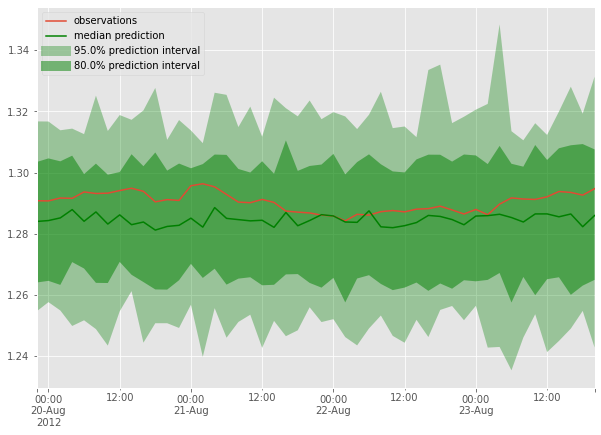

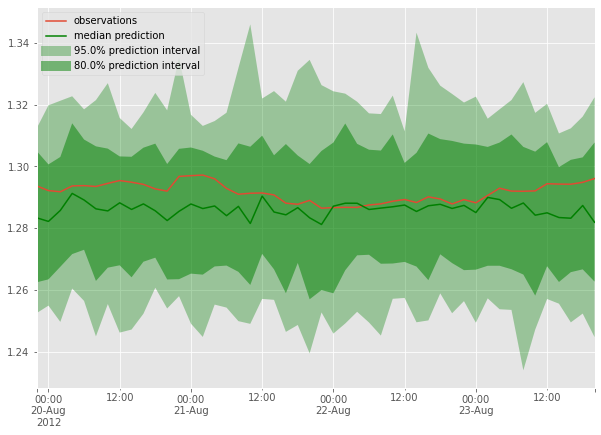

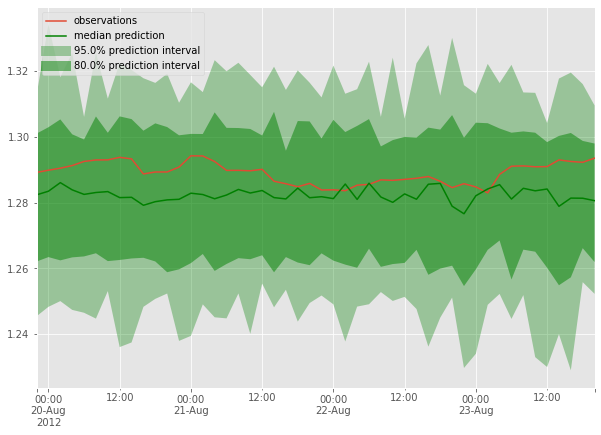

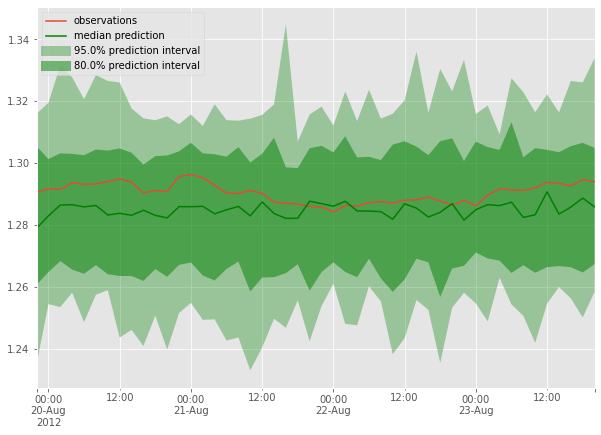

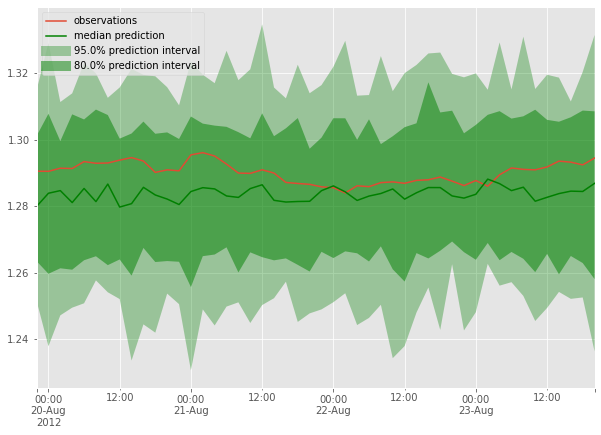

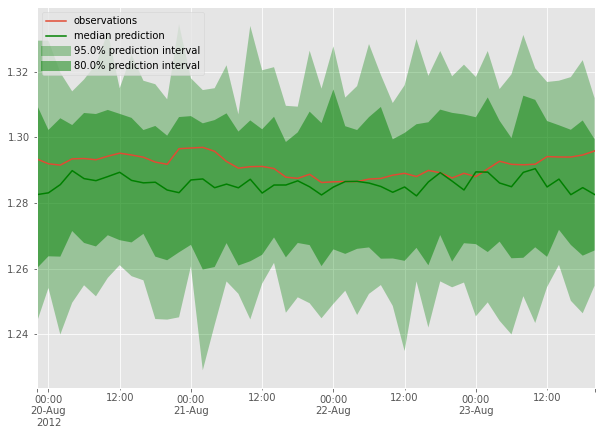

In [94]:
for i in tqdm(range(6)):
    ts_entry = tss[i]
    forecast_entry = forecasts[i]
    plot_prob_forecasts(ts_entry, forecast_entry)

In [95]:
from gluonts.evaluation import Evaluator
evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts), num_series=len(df_test[0:7]))

Running evaluation: 100%|████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 75.19it/s]


In [96]:
item_metrics

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,NaN,0.000048,0.279528,61.938141,1.290378,0.006480,0.898696,0.004508,0.004521,10.812616,0.249685,0.0,0.279528,0.062500,0.129588,1.0
1,NaN,0.000045,0.271285,61.998886,1.291643,0.006446,0.876769,0.004370,0.004384,10.900195,0.244991,0.0,0.271285,0.062500,0.136965,1.0
2,NaN,0.000063,0.329882,61.876320,1.289090,0.006543,1.050380,0.005325,0.005343,10.986798,0.260935,0.0,0.329882,0.062500,0.125568,1.0
3,NaN,0.000046,0.278933,61.941341,1.290445,0.006475,0.897475,0.004499,0.004512,10.861881,0.244452,0.0,0.278933,0.104167,0.130501,1.0
4,NaN,0.000052,0.314596,61.925964,1.290124,0.006474,1.012410,0.005075,0.005091,10.991538,0.254365,0.0,0.314596,0.062500,0.141094,1.0
5,NaN,0.000046,0.268276,61.986530,1.291386,0.006438,0.868163,0.004323,0.004336,10.878614,0.249746,0.0,0.268276,0.062500,0.133234,1.0
6,NaN,0.000047,0.293692,61.864212,1.288838,0.006543,0.935173,0.004743,0.004757,10.631480,0.245064,0.0,0.293692,0.083333,0.142201,1.0


In [97]:
feat_add=pd.DataFrame(df_input[['T_out']][:train_time].values).apply(lambda x: np.asarray(x), axis=1).tolist()

KeyError: "None of [Index(['T_out'], dtype='object')] are in the [columns]"

In [ ]:
feat_add

### Training a DeepAR Estimator
Some estimators have specific, SageMaker constructors, but not all. Instead you can create a base Estimator and pass in the specific image (or container) that holds a specific model.

Next, we configure the container image to be used for the region that we are running in.

In [ ]:
from sagemaker.amazon.amazon_estimator import get_image_uri

image_name = get_image_uri(boto3.Session().region_name, # get the region
                           'forecasting-deepar') # specify image